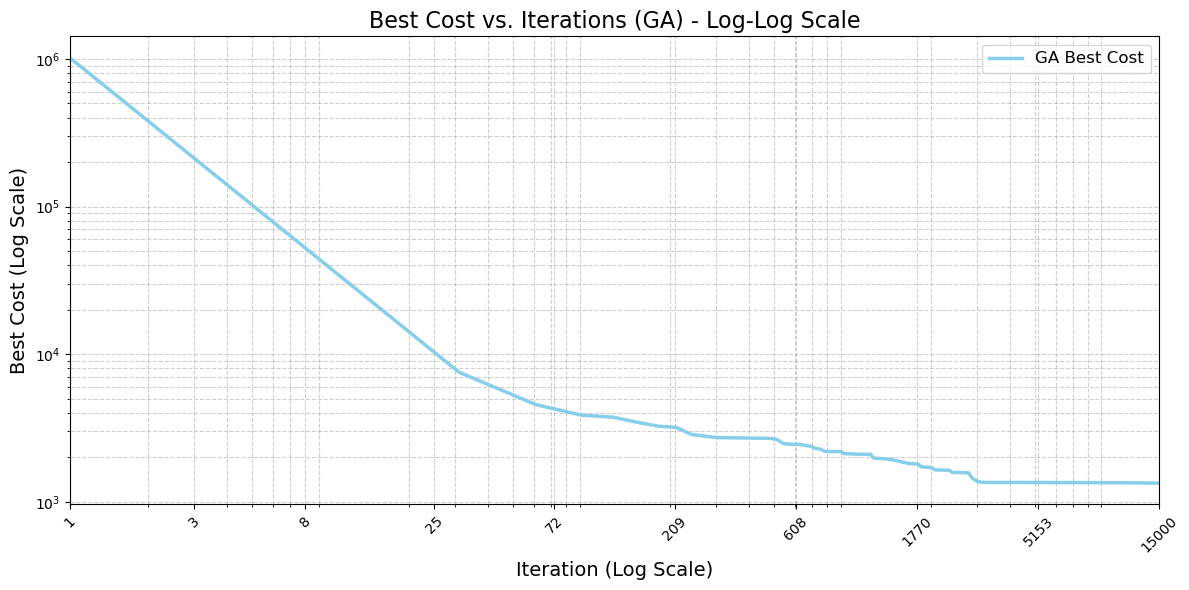

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Data
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 64, 66, 69, 70, 72, 74, 76, 78, 80, 83, 88, 90, 94, 96, 102, 104, 109, 112, 114, 123, 127, 132, 142, 144, 148, 154, 162, 163, 165, 167, 168, 179, 193, 201, 205, 207, 216, 217, 218, 220, 221, 236, 239, 244, 262, 298, 299, 300, 357, 366, 509, 515, 541, 542, 543, 546, 637, 645, 689, 718, 721, 750, 774, 785, 925, 926, 996, 1005, 1052, 1186, 1199, 1331, 1473, 1515, 1676, 1787, 1789, 1824, 1840, 1943, 1999, 2018, 2032, 2049, 2051, 2191, 2343, 2422, 2610, 2791, 2834, 3063, 3178, 10012, 15000]
BestCostGA = [1021914, 852009, 810346, 579890, 514399, 459733, 399659, 399517, 290406, 289523, 229757, 229251, 229126, 229021, 228871, 228259, 228019, 118742, 118090, 117940, 117850, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]


def process_and_plot(iterations, best_cost, color, label, ax):
    """Processes and plots the data with PCHIP and monotonicity."""

    # Sort the data (important for PCHIP)
    sorted_data = sorted(zip(iterations, best_cost))
    iterations, best_cost = zip(*sorted_data)

    # PCHIP Interpolation
    pchip = PchipInterpolator(iterations, best_cost)
    xnew = np.linspace(max(1, min(iterations)), max(iterations), 500)  # Start x at 1
    y_smooth = pchip(xnew)

    # Enforce monotonicity (non-increasing)
    # Note: We *don't* force y >= 0 here, because log(0) is undefined.
    #       We'll handle small/zero values in the plotting stage.
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions on a log scale."""
    log_min = np.log10(max(min_val, 1))  # Ensure min_val is at least 1
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= max(1, min_val)) & (int_ticks <= max_val)]
    return int_ticks


# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
process_and_plot(iterationsGA, BestCostGA, 'skyblue', 'GA Best Cost', ax)

# Set x-axis to log scale and integer ticks
max_iteration = max(iterationsGA)
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)  # x-axis starts at 1

# Set y-axis to log scale
ax.set_yscale('log')

# Set plot title and labels
ax.set_title('Best Cost vs. Iterations (GA) - Log-Log Scale', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Best Cost (Log Scale)', fontsize=14)

# Add grid, legend, and adjust layout
ax.grid(True, which="both", ls="--", alpha=0.6)
# No need to set y-axis limits manually with log scale; matplotlib handles it
ax.legend(fontsize=12)
plt.tight_layout()

# Save and show the plot
plt.savefig("best_cost_vs_iterations_GA_pchip_loglog.svg", format='svg')
plt.show()

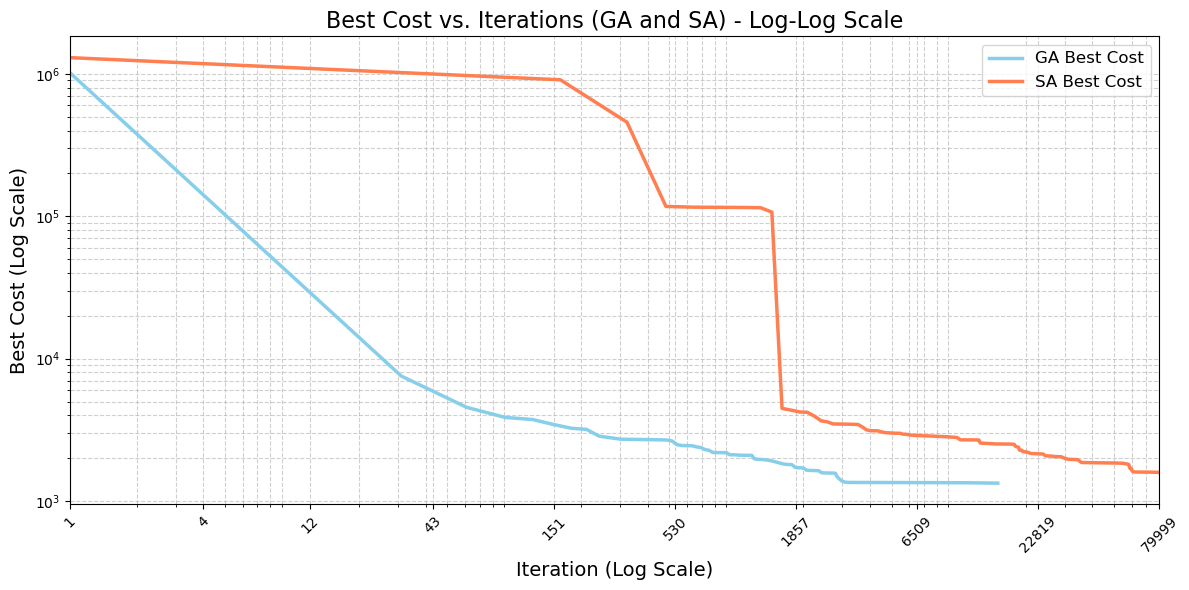

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Data for GA
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 64, 66, 69, 70, 72, 74, 76, 78, 80, 83, 88, 90, 94, 96, 102, 104, 109, 112, 114, 123, 127, 132, 142, 144, 148, 154, 162, 163, 165, 167, 168, 179, 193, 201, 205, 207, 216, 217, 218, 220, 221, 236, 239, 244, 262, 298, 299, 300, 357, 366, 509, 515, 541, 542, 543, 546, 637, 645, 689, 718, 721, 750, 774, 785, 925, 926, 996, 1005, 1052, 1186, 1199, 1331, 1473, 1515, 1676, 1787, 1789, 1824, 1840, 1943, 1999, 2018, 2032, 2049, 2051, 2191, 2343, 2422, 2610, 2791, 2834, 3063, 3178, 10012, 15000]
BestCostGA = [1021914, 852009, 810346, 579890, 514399, 459733, 399659, 399517, 290406, 289523, 229757, 229251, 229126, 229021, 228871, 228259, 228019, 118742, 118090, 117940, 117850, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# Data for SA (provided in the problem description)
iterationsSA = [1, 3, 5, 9, 13, 17, 23, 26, 38, 42, 46, 73, 79, 88, 89, 92, 101, 109, 125, 133, 151, 177, 179, 181, 189, 194, 206, 230, 235, 253, 261, 269, 273, 295, 300, 303, 317, 335, 346, 361, 371, 377, 382, 383, 394, 404, 415, 422, 431, 453, 454, 455, 458, 463, 468, 476, 482, 525, 529, 531, 551, 552, 554, 560, 580, 581, 589, 595, 610, 643, 681, 697, 715, 809, 829, 886, 958, 982, 1031, 1046, 1051, 1109, 1125, 1130, 1131, 1198, 1224, 1281, 1321, 1327, 1374, 1381, 1439, 1469, 1485, 1502, 1506, 1632, 1662, 1718, 1763, 1778, 1846, 2067, 2426, 2465, 2567, 2579, 2718, 3111, 3613, 3729, 3765, 3804, 3877, 3984, 4355, 4492, 4563, 4668, 4931, 5154, 5470, 5504, 5793, 6104, 6529, 7466, 9118, 9810, 10059, 10135, 10220, 12336, 12411, 13816, 14659, 17249, 17885, 17915, 17926, 18129, 18594, 18657, 18786, 19320, 19395, 20331, 21118, 22408, 23480, 23803, 24332, 24390, 24653, 26478, 26481, 28744, 29989, 31284, 34167, 35850, 45830, 51475, 55000, 55811, 56062, 58250, 58529, 58644, 58761, 58858, 58904, 59380, 60014, 60030, 61706, 79757, 79999]
BestCostSA = [1300471, 1300471, 1240363, 1240351, 1180634, 1180532, 1180454, 1180384, 1130294, 1129909, 1129866, 1129781, 1129777, 1019981, 909531, 909496, 909259, 909235, 909073, 909048, 908837, 908832, 688312, 688310, 688169, 688067, 687995, 677996, 677936, 568305, 518310, 458292, 458250, 458178, 458172, 458160, 458088, 458070, 458010, 457902, 457842, 457825, 457717, 397825, 288017, 287945, 287915, 237892, 178222, 178189, 178025, 178015, 177564, 177228, 117300, 117278, 117242, 117134, 117020, 116932, 116884, 116670, 116575, 116495, 116184, 116178, 116123, 116063, 115909, 115843, 115763, 115755, 115743, 115623, 115527, 115497, 115467, 115443, 115407, 115359, 115319, 115309, 115201, 115057, 114958, 114936, 114904, 114856, 114844, 114838, 114727, 114715, 114649, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]


def process_and_plot(iterations, best_cost, color, label, ax):
    """Processes and plots the data with PCHIP and monotonicity."""

    # Sort the data (important for PCHIP)
    sorted_data = sorted(zip(iterations, best_cost))
    iterations, best_cost = zip(*sorted_data)

    # PCHIP Interpolation
    pchip = PchipInterpolator(iterations, best_cost)
    xnew = np.linspace(max(1, min(iterations)), max(iterations), 500)  # Start x at 1
    y_smooth = pchip(xnew)

    # Enforce monotonicity (non-increasing)
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions on a log scale."""
    log_min = np.log10(max(min_val, 1))
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= max(1, min_val)) & (int_ticks <= max_val)]
    return int_ticks


# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the GA data
process_and_plot(iterationsGA, BestCostGA, 'skyblue', 'GA Best Cost', ax)

# Plot the SA data
process_and_plot(iterationsSA, BestCostSA, 'coral', 'SA Best Cost', ax)


# --- X-axis setup (log scale, integer ticks, xlim) ---
max_iteration = max(max(iterationsGA), max(iterationsSA))  # Find overall max
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)  # Start at 1
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)  # Enforce x-axis limits

# --- Y-axis setup (log scale) ---
ax.set_yscale('log')

# --- Plot styling ---
ax.set_title('Best Cost vs. Iterations (GA and SA) - Log-Log Scale', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Best Cost (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

# --- Save and show ---
plt.savefig("best_cost_vs_iterations_GA_SA_pchip_loglog.svg", format='svg')
plt.show()

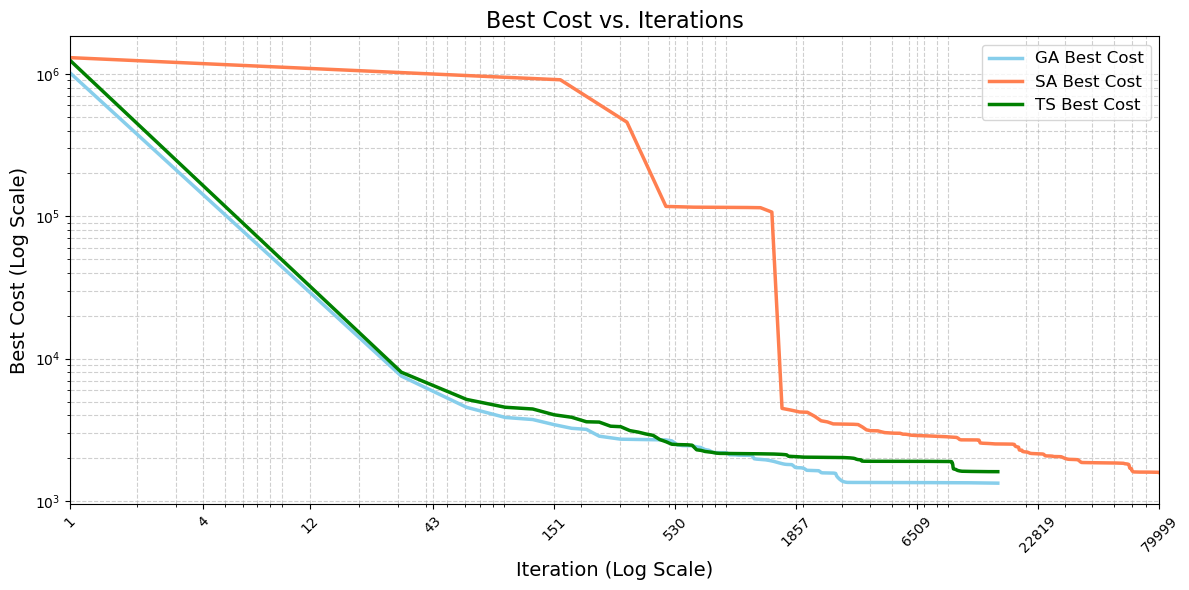

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Data for GA
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 64, 66, 69, 70, 72, 74, 76, 78, 80, 83, 88, 90, 94, 96, 102, 104, 109, 112, 114, 123, 127, 132, 142, 144, 148, 154, 162, 163, 165, 167, 168, 179, 193, 201, 205, 207, 216, 217, 218, 220, 221, 236, 239, 244, 262, 298, 299, 300, 357, 366, 509, 515, 541, 542, 543, 546, 637, 645, 689, 718, 721, 750, 774, 785, 925, 926, 996, 1005, 1052, 1186, 1199, 1331, 1473, 1515, 1676, 1787, 1789, 1824, 1840, 1943, 1999, 2018, 2032, 2049, 2051, 2191, 2343, 2422, 2610, 2791, 2834, 3063, 3178, 10012, 15000]
BestCostGA = [1021914, 852009, 810346, 579890, 514399, 459733, 399659, 399517, 290406, 289523, 229757, 229251, 229126, 229021, 228871, 228259, 228019, 118742, 118090, 117940, 117850, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# Data for SA
iterationsSA = [1, 5, 9, 13, 17, 23, 26, 38, 42, 46, 73, 79, 88, 89, 92, 101, 109, 125, 133, 151, 177, 179, 181, 189, 194, 206, 230, 235, 253, 261, 269, 273, 295, 300, 303, 317, 335, 346, 361, 371, 377, 382, 383, 394, 404, 415, 422, 431, 453, 454, 455, 458, 463, 468, 476, 482, 525, 529, 531, 551, 552, 554, 560, 580, 581, 589, 595, 610, 643, 681, 697, 715, 809, 829, 886, 958, 982, 1031, 1046, 1051, 1109, 1125, 1130, 1131, 1198, 1224, 1281, 1321, 1327, 1374, 1381, 1439, 1469, 1485, 1502, 1506, 1632, 1662, 1718, 1763, 1778, 1846, 2067, 2426, 2465, 2567, 2579, 2718, 3111, 3613, 3729, 3765, 3804, 3877, 3984, 4355, 4492, 4563, 4668, 4931, 5154, 5470, 5504, 5793, 6104, 6529, 7466, 9118, 9810, 10059, 10135, 10220, 12336, 12411, 13816, 14659, 17249, 17885, 17915, 17926, 18129, 18594, 18657, 18786, 19320, 19395, 20331, 21118, 22408, 23480, 23803, 24332, 24390, 24653, 26478, 26481, 28744, 29989, 31284, 34167, 35850, 45830, 51475, 55000, 55811, 56062, 58250, 58529, 58644, 58761, 58858, 58904, 59380, 60014, 60030, 61706, 79757, 79999]
BestCostSA = [1300471, 1240363, 1240351, 1180634, 1180532, 1180454, 1180384, 1130294, 1129909, 1129866, 1129781, 1129777, 1019981, 909531, 909496, 909259, 909235, 909073, 909048, 908837, 908832, 688312, 688310, 688169, 688067, 687995, 677996, 677936, 568305, 518310, 458292, 458250, 458178, 458172, 458160, 458088, 458070, 458010, 457902, 457842, 457825, 457717, 397825, 288017, 287945, 287915, 237892, 178222, 178189, 178025, 178015, 177564, 177228, 117300, 117278, 117242, 117134, 117020, 116932, 116884, 116670, 116575, 116495, 116184, 116178, 116123, 116063, 115909, 115843, 115763, 115755, 115743, 115623, 115527, 115497, 115467, 115443, 115407, 115359, 115319, 115309, 115201, 115057, 114958, 114936, 114904, 114856, 114844, 114838, 114727, 114715, 114649, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# Data for TS
iterationsTS = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 35, 37, 38, 39, 40, 41, 45, 47, 48, 50, 51, 53, 54, 55, 58, 60, 61, 63, 64, 65, 66, 68, 72, 74, 76, 81, 84, 85, 86, 91, 92, 100, 118, 124, 126, 127, 129, 131, 134, 143, 145, 150, 151, 154, 158, 160, 162, 172, 185, 188, 191, 195, 200, 228, 243, 256, 257, 267, 279, 294, 305, 308, 310, 311, 314, 336, 343, 344, 350, 351, 371, 376, 383, 388, 396, 407, 416, 417, 422, 424, 440, 444, 458, 461, 499, 505, 509, 516, 518, 553, 632, 636, 648, 656, 658, 678, 721, 808, 816, 832, 1155, 1681, 1700, 1752, 1834, 2027, 2374, 2938, 3222, 3379, 3432, 3462, 3503, 3590, 3654, 3668, 3811, 8862, 9300, 9319, 9338, 9383, 9468, 9554, 9722, 9797, 10075, 10361, 14999]
BestCostTS = [1251318, 1191600, 1071636, 1011558, 901415, 841331, 841034, 840770, 560528, 560498, 560355, 560073, 339189, 289179, 288970, 128700, 128620, 128425, 128323, 68449, 68365, 8406, 8311, 8306, 8276, 8100, 8050, 7027, 6950, 6614, 6559, 6537, 6522, 6276, 6270, 6156, 5714, 5664, 5604, 5428, 5374, 5354, 5319, 5215, 5180, 4990, 4946, 4934, 4912, 4822, 4742, 4736, 4664, 4654, 4610, 4596, 4576, 4564, 4504, 4456, 4445, 4409, 4348, 4310, 4267, 4201, 4135, 4110, 4104, 4050, 4040, 3974, 3956, 3931, 3920, 3881, 3876, 3842, 3672, 3612, 3608, 3602, 3584, 3505, 3439, 3368, 3345, 3335, 3325, 3312, 3262, 3226, 3196, 3112, 3094, 3081, 3059, 3053, 3048, 3026, 3020, 2966, 2954, 2943, 2918, 2900, 2894, 2870, 2716, 2710, 2700, 2645, 2590, 2562, 2514, 2503, 2498, 2492, 2468, 2446, 2381, 2336, 2296, 2286, 2232, 2178, 2167, 2163, 2152, 2114, 2070, 2060, 2054, 2034, 2030, 2024, 2012, 1997, 1983, 1969, 1959, 1949, 1944, 1910, 1904, 1898, 1893, 1884, 1849, 1838, 1686, 1678, 1668, 1652, 1630, 1620, 1609]

def process_and_plot(iterations, best_cost, color, label, ax):
    """Processes and plots the data with PCHIP and monotonicity."""

    # Sort the data (important for PCHIP)
    sorted_data = sorted(zip(iterations, best_cost))
    iterations, best_cost = zip(*sorted_data)

    # PCHIP Interpolation
    pchip = PchipInterpolator(iterations, best_cost)
    xnew = np.linspace(max(1, min(iterations)), max(iterations), 500)  # Start x at 1
    y_smooth = pchip(xnew)

    # Enforce monotonicity (non-increasing)
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)


def integer_log_ticks(min_val, max_val, num_ticks=10):
    """Generates integer tick positions on a log scale."""
    log_min = np.log10(max(min_val, 1))
    log_max = np.log10(max_val)
    log_ticks = np.logspace(log_min, log_max, num_ticks)
    int_ticks = np.unique(np.round(log_ticks).astype(int))
    int_ticks = int_ticks[(int_ticks >= max(1, min_val)) & (int_ticks <= max_val)]
    return int_ticks


# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the GA data
process_and_plot(iterationsGA, BestCostGA, 'skyblue', 'GA Best Cost', ax)

# Plot the SA data
process_and_plot(iterationsSA, BestCostSA, 'coral', 'SA Best Cost', ax)

# Plot the TS data
process_and_plot(iterationsTS, BestCostTS, 'green', 'TS Best Cost', ax)


# --- X-axis setup (log scale, integer ticks, xlim) ---
max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS))
ax.set_xscale('log')
tick_positions = integer_log_ticks(1, max_iteration)
ax.set_xticks(tick_positions)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)

# --- Y-axis setup (log scale) ---
ax.set_yscale('log')

# --- Plot styling ---
ax.set_title('Best Cost vs. Iterations', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Best Cost (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

# --- Save and show ---
plt.savefig("best_cost_vs_iterations_GA_SA_TS_pchip_loglog.svg", format='svg')
plt.show()

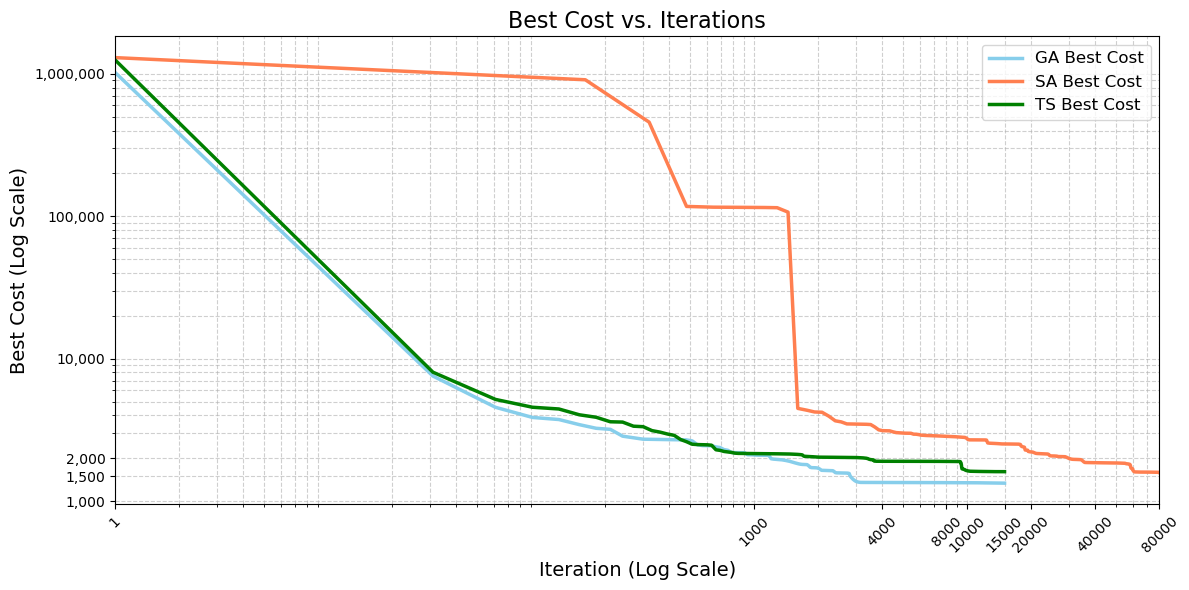

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator
import matplotlib.ticker as ticker

# Data for GA
iterationsGA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 63, 64, 66, 69, 70, 72, 74, 76, 78, 80, 83, 88, 90, 94, 96, 102, 104, 109, 112, 114, 123, 127, 132, 142, 144, 148, 154, 162, 163, 165, 167, 168, 179, 193, 201, 205, 207, 216, 217, 218, 220, 221, 236, 239, 244, 262, 298, 299, 300, 357, 366, 509, 515, 541, 542, 543, 546, 637, 645, 689, 718, 721, 750, 774, 785, 925, 926, 996, 1005, 1052, 1186, 1199, 1331, 1473, 1515, 1676, 1787, 1789, 1824, 1840, 1943, 1999, 2018, 2032, 2049, 2051, 2191, 2343, 2422, 2610, 2791, 2834, 3063, 3178, 10012, 15000]
BestCostGA = [1021914, 852009, 810346, 579890, 514399, 459733, 399659, 399517, 290406, 289523, 229757, 229251, 229126, 229021, 228871, 228259, 228019, 118742, 118090, 117940, 117850, 7999, 7899, 7839, 7791, 7746, 7559, 7401, 7287, 7192, 7056, 6930, 6537, 6201, 5915, 5789, 5623, 5557, 5443, 5374, 5194, 5144, 5135, 5134, 4955, 4945, 4845, 4820, 4718, 4641, 4622, 4567, 4556, 4501, 4449, 4413, 4311, 4263, 4185, 4137, 4095, 4083, 4023, 3987, 3933, 3878, 3848, 3836, 3826, 3808, 3796, 3789, 3756, 3732, 3690, 3678, 3667, 3606, 3535, 3392, 3387, 3365, 3309, 3287, 3251, 3246, 3236, 3230, 3218, 3194, 3184, 3139, 3137, 3092, 3054, 3044, 2938, 2807, 2787, 2769, 2757, 2721, 2709, 2703, 2679, 2607, 2504, 2486, 2480, 2462, 2444, 2420, 2380, 2350, 2302, 2278, 2218, 2194, 2182, 2117, 2111, 2105, 2099, 2093, 1985, 1955, 1900, 1876, 1810, 1800, 1790, 1753, 1720, 1714, 1703, 1692, 1676, 1666, 1648, 1640, 1634, 1579, 1577, 1566, 1489, 1363, 1352, 1346, 1336]

# Data for SA
iterationsSA = [1, 5, 9, 13, 17, 23, 26, 38, 42, 46, 73, 79, 88, 89, 92, 101, 109, 125, 133, 151, 177, 179, 181, 189, 194, 206, 230, 235, 253, 261, 269, 273, 295, 300, 303, 317, 335, 346, 361, 371, 377, 382, 383, 394, 404, 415, 422, 431, 453, 454, 455, 458, 463, 468, 476, 482, 525, 529, 531, 551, 552, 554, 560, 580, 581, 589, 595, 610, 643, 681, 697, 715, 809, 829, 886, 958, 982, 1031, 1046, 1051, 1109, 1125, 1130, 1131, 1198, 1224, 1281, 1321, 1327, 1374, 1381, 1439, 1469, 1485, 1502, 1506, 1632, 1662, 1718, 1763, 1778, 1846, 2067, 2426, 2465, 2567, 2579, 2718, 3111, 3613, 3729, 3765, 3804, 3877, 3984, 4355, 4492, 4563, 4668, 4931, 5154, 5470, 5504, 5793, 6104, 6529, 7466, 9118, 9810, 10059, 10135, 10220, 12336, 12411, 13816, 14659, 17249, 17885, 17915, 17926, 18129, 18594, 18657, 18786, 19320, 19395, 20331, 21118, 22408, 23480, 23803, 24332, 24390, 24653, 26478, 26481, 28744, 29989, 31284, 34167, 35850, 45830, 51475, 55000, 55811, 56062, 58250, 58529, 58644, 58761, 58858, 58904, 59380, 60014, 60030, 61706, 79757, 80000]
BestCostSA = [1300471, 1240363, 1240351, 1180634, 1180532, 1180454, 1180384, 1130294, 1129909, 1129866, 1129781, 1129777, 1019981, 909531, 909496, 909259, 909235, 909073, 909048, 908837, 908832, 688312, 688310, 688169, 688067, 687995, 677996, 677936, 568305, 518310, 458292, 458250, 458178, 458172, 458160, 458088, 458070, 458010, 457902, 457842, 457825, 457717, 397825, 288017, 287945, 287915, 237892, 178222, 178189, 178025, 178015, 177564, 177228, 117300, 117278, 117242, 117134, 117020, 116932, 116884, 116670, 116575, 116495, 116184, 116178, 116123, 116063, 115909, 115843, 115763, 115755, 115743, 115623, 115527, 115497, 115467, 115443, 115407, 115359, 115319, 115309, 115201, 115057, 114958, 114936, 114904, 114856, 114844, 114838, 114727, 114715, 114649, 4998, 4974, 4681, 4675, 4433, 4402, 4391, 4356, 4235, 4229, 4211, 3650, 3639, 3597, 3498, 3483, 3472, 3434, 3268, 3267, 3179, 3157, 3124, 3112, 3064, 3053, 3023, 3008, 2997, 2993, 2953, 2947, 2903, 2885, 2863, 2821, 2797, 2722, 2698, 2692, 2686, 2565, 2535, 2519, 2513, 2491, 2469, 2447, 2414, 2391, 2294, 2282, 2276, 2231, 2209, 2161, 2150, 2144, 2142, 2109, 2092, 2078, 2067, 2056, 2051, 1996, 1965, 1954, 1866, 1856, 1850, 1844, 1830, 1829, 1807, 1763, 1737, 1722, 1710, 1704, 1692, 1680, 1656, 1602, 1591, 1585]

# Data for TS
iterationsTS = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 35, 37, 38, 39, 40, 41, 45, 47, 48, 50, 51, 53, 54, 55, 58, 60, 61, 63, 64, 65, 66, 68, 72, 74, 76, 81, 84, 85, 86, 91, 92, 100, 118, 124, 126, 127, 129, 131, 134, 143, 145, 150, 151, 154, 158, 160, 162, 172, 185, 188, 191, 195, 200, 228, 243, 256, 257, 267, 279, 294, 305, 308, 310, 311, 314, 336, 343, 344, 350, 351, 371, 376, 383, 388, 396, 407, 416, 417, 422, 424, 440, 444, 458, 461, 499, 505, 509, 516, 518, 553, 632, 636, 648, 656, 658, 678, 721, 808, 816, 832, 1155, 1681, 1700, 1752, 1834, 2027, 2374, 2938, 3222, 3379, 3432, 3462, 3503, 3590, 3654, 3668, 3811, 8862, 9300, 9319, 9338, 9383, 9468, 9554, 9722, 9797, 10075, 10361, 14999]
BestCostTS = [1251318, 1191600, 1071636, 1011558, 901415, 841331, 841034, 840770, 560528, 560498, 560355, 560073, 339189, 289179, 288970, 128700, 128620, 128425, 128323, 68449, 68365, 8406, 8311, 8306, 8276, 8100, 8050, 7027, 6950, 6614, 6559, 6537, 6522, 6276, 6270, 6156, 5714, 5664, 5604, 5428, 5374, 5354, 5319, 5215, 5180, 4990, 4946, 4934, 4912, 4822, 4742, 4736, 4664, 4654, 4610, 4596, 4576, 4564, 4504, 4456, 4445, 4409, 4348, 4310, 4267, 4201, 4135, 4110, 4104, 4050, 4040, 3974, 3956, 3931, 3920, 3881, 3876, 3842, 3672, 3612, 3608, 3602, 3584, 3505, 3439, 3368, 3345, 3335, 3325, 3312, 3262, 3226, 3196, 3112, 3094, 3081, 3059, 3053, 3048, 3026, 3020, 2966, 2954, 2943, 2918, 2900, 2894, 2870, 2716, 2710, 2700, 2645, 2590, 2562, 2514, 2503, 2498, 2492, 2468, 2446, 2381, 2336, 2296, 2286, 2232, 2178, 2167, 2163, 2152, 2114, 2070, 2060, 2054, 2034, 2030, 2024, 2012, 1997, 1983, 1969, 1959, 1949, 1944, 1910, 1904, 1898, 1893, 1884, 1849, 1838, 1686, 1678, 1668, 1652, 1630, 1620, 1609]

def process_and_plot(iterations, best_cost, color, label, ax):
    """Processes and plots the data with PCHIP and monotonicity."""

    # Sort the data (important for PCHIP)
    sorted_data = sorted(zip(iterations, best_cost))
    iterations, best_cost = zip(*sorted_data)

    # PCHIP Interpolation
    pchip = PchipInterpolator(iterations, best_cost)
    xnew = np.linspace(max(1, min(iterations)), max(iterations), 500)  # Start x at 1
    y_smooth = pchip(xnew)

    # Enforce monotonicity (non-increasing)
    for i in range(1, len(y_smooth)):
        y_smooth[i] = min(y_smooth[i - 1], y_smooth[i])

    ax.plot(xnew, y_smooth, color=color, linewidth=2.5, label=label)


# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the GA data
process_and_plot(iterationsGA, BestCostGA, 'skyblue', 'GA Best Cost', ax)

# Plot the SA data
process_and_plot(iterationsSA, BestCostSA, 'coral', 'SA Best Cost', ax)

# Plot the TS data
process_and_plot(iterationsTS, BestCostTS, 'green', 'TS Best Cost', ax)


# --- X-axis setup (log scale, SPECIFIC integer ticks, xlim) ---
max_iteration = max(max(iterationsGA), max(iterationsSA), max(iterationsTS))
ax.set_xscale('log')
# Use EXACTLY the specified tick positions:
tick_positions_x = [1, 1000, 4000, 8000, 10000, 15000, 20000, 40000, 80000]
ax.set_xticks(tick_positions_x)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Ensure integer format
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(1, max_iteration)  # Still enforce x-axis limits

# --- Y-axis setup (log scale, SPECIFIC ticks and labels) ---
ax.set_yscale('log')
tick_positions_y = [10**3, 1500, 2000, 10**4, 10**5, 10**6]
ax.set_yticks(tick_positions_y)
# Use a custom formatter for the y-axis labels
ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


# --- Plot styling ---
ax.set_title('Best Cost vs. Iterations', fontsize=16)
ax.set_xlabel('Iteration (Log Scale)', fontsize=14)
ax.set_ylabel('Best Cost (Log Scale)', fontsize=14)
ax.grid(True, which="both", ls="--", alpha=0.6)
ax.legend(fontsize=12)
plt.tight_layout()

# --- Save and show ---
plt.savefig("best_cost_vs_iterations_GA_SA_TS_pchip_loglog_custom_ticks.svg", format='svg')
plt.show()